## Stock Price Prediction using Machine Learning and Artificial Intelligence

**Table of Contents**
- Introduction
- Data Preprocessing Part A, B and C
- Exploratory Data Analytics
- Predictive Analytics
- Building the Algorithms
- Hyperparameter Tuning
- Deep Neural Network
- Feature Selection and Importance
- Limitations
- Disclaimer

### Introduction

This project seeks to utilize historic data to predict the future stock price of Honeywell International Inc.(HON) using machine learning algorithms and deep neural network. One of the state-of-the-art algorithms in deep neural network, Long Short Term Memory (LSTM) was used in addition to several machine learning algorithms. While all the machine algorithms showed impressive performance, LSTM came out as the best algorithm, slightly edging out XGBoost (the second best algorithm) even without parameter tuning using root mean squared error (RMSE) as the evaluation metric. 

The algorithms used range from - 

**simple algorithms such as:**
- Linear Regression 
- K-Nearest Neighbor (KNN)
- Decision Tree 

**to ensemble models such as:**
- Random Forest
- Bagging
- Ada Boost
- Gradient Boosting
- XGBoost
- Stacking Regressor

**as well as state-of-the-art algorithms in artificial intelligence and deep neural network such as:**
- MLP Regressor
- Long Short Term Memory (LSTM). 

## Features Description

**The dependent variable is:**
- HWClose: Honeywell closing stock price 

** 30 predictors were used and they are:**
- SPClose: S&P500 index closing price
- CPIAUCNS: Monthly Consumer Price Index for All Urban Consumers for All Items (not seasonally adjusted)
- CPIAUCSL: Monthly Consumer Price Index for All Urban Consumers for All Items (seasonally adjusted)
- InflationRate: Monthly inflation rate
- InflationRateAdj: Monthly inflationa rate adjusted for seasonality
- 10YrTRdai: Daily 10-Year Treasury Constant Maturity Rate
- 10YrTRweek: Weekly 10-Year Treasury Constant Maturity Rate 
- 10YrTRmon: Monthly 10-Year Treasury Constant Maturity Rate
- 3MTBDaily: Daily 3-Month Treasury Bill (Secondary Market Rate)
- 3MTBWeek: Weekly 3-Month Treasury Bill (Secondary Market Rate)
- 3MTBMon: Monthly 3-Month Treasury Bill (Secondary Market Rate)
- BrentDaily: Daily Crude Oil Prices (Brent - Europe)
- DollarEuro: Daily U.S./Euro Foreign Exchange Rate
- DollarPound: Daily U.S./U.K. Foreign Exchange Rate
- DollarMajCurr: Daily Trade Weighted U.S. Dollar Index to Major Currencies indices from the Euro Area, Canada, Japan, United Kingdom, Switzerland, etc.
- FFRDaily: Daily Effective Federal Funds Rate
- FFRWeek: Weekly Effective Federal Funds Rate
- FFRMon: Monthly Effective Federal Funds Rate
- GDPQuartAdj: Percent Change in Quarterly Real Gross Domestic Product (Seasonally Adjusted Annual Rate)
- GDPQuartYoYAdj: Year Over Year (YoY) Percent Change in Quarterly Real Gross Domestic Product (Seasonally Adjusted Annual Rate)
- GDPAnnuaUnadj: Annual Percent Change in Real Gross Domestic Product (Not Seasonally Adjusted)
- T10Y2YD: Daily 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
- T10Y2YM: Monthly 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
- UnemplMonUnadj: Monthly Civilian Unemployment Rate (Unadjusted)
- UnempMonAdj: Monthly Civilian Unemployment Rate (Seasonally Adjusted)
- DateDay: Day of the month e.g. The 5th day of the month is assigned 5, 24th day assigned 24, etc
- DateWeek: Week of the year e.g. the fifteenth week of the year is assigned 15, the fiftieth week assigned 50, etc
- DateMonth: Month of the year e.g. January is assigned 1, September is assigned 9, etc
- DateYear: 1970, 1980, 2008, 2018, etc all converted to int and later scaled
- DateDayOfYear: Jan 1 is assigned 1, Dec 31 is assigned 365 or 366 (if a leap year)

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from functools import reduce
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Loading the datasets

** Two types of datasets were sourced for this project:**
- all macroeconomic datasets were sourced from the US Federal Reserve Bank website [fred](https://fred.stlouisfed.org/)
- 49 years of stock price data for Honeywell and the S&P500 covering the priod from January 1970 to January 2019 data were downloaded from Yahoo Finance [YahooFinance](https://finance.yahoo.com/)

In [2]:
#Loading the files and converting the date column to datetime
honey = pd.read_csv('honeywell.csv')
honey['Date'] = pd.to_datetime(honey['DATE'],format="%m/%d/%Y")
spIndex = pd.read_csv('GSPC.csv')
spIndex['Date'] = pd.to_datetime(spIndex['DATE'],format="%m/%d/%Y")
# df.replace('\.+', np.nan, regex=True)
treasDaily = pd.read_csv('10YrTRdaily.csv')
treasDaily['Date'] = pd.to_datetime(treasDaily['DATE'],format="%m/%d/%Y")
treasWeek = pd.read_csv('10YrTRweek.csv')
treasWeek['Date'] = pd.to_datetime(treasWeek['DATE'],format="%m/%d/%Y")
treasMon = pd.read_csv('10YrTRmon.csv')
treasMon['Date'] = pd.to_datetime(treasMon['DATE'],format="%m/%d/%Y")
tBillDaily = pd.read_csv('3MTBDaily.csv')
tBillDaily['Date'] = pd.to_datetime(tBillDaily['DATE'],format="%m/%d/%Y")
tBillWeek = pd.read_csv('3MTBWeek.csv')
tBillWeek['Date'] = pd.to_datetime(tBillWeek['DATE'],format="%m/%d/%Y")
tBillMon = pd.read_csv('3MTBMon.csv')
tBillMon['Date'] = pd.to_datetime(tBillMon['DATE'],format="%m/%d/%Y")
brent = pd.read_csv('BrentDaily.csv')
brent['Date'] = pd.to_datetime(brent['DATE'],format="%m/%d/%Y")
cpi = pd.read_csv('CPIMonUnadj.csv')
cpi['Date'] = pd.to_datetime(cpi['DATE'],format="%m/%d/%Y")
cpiAdj = pd.read_csv('CPIMonAdj.csv')
cpiAdj['Date'] = pd.to_datetime(cpiAdj['DATE'],format="%m/%d/%Y")
dollarEuro = pd.read_csv('DollarEuroEx.csv')
dollarEuro['Date'] = pd.to_datetime(dollarEuro['DATE'],format="%m/%d/%Y")
dollarPound = pd.read_csv('DollarPoundEx.csv')
dollarPound['Date'] = pd.to_datetime(dollarPound['DATE'],format="%m/%d/%Y")
dollarOthers = pd.read_csv('DollarMajCurre.csv')
dollarOthers['Date'] = pd.to_datetime(dollarOthers['DATE'],format="%m/%d/%Y")
ffrDaily = pd.read_csv('FFRDaily.csv')
ffrDaily['Date'] = pd.to_datetime(ffrDaily['DATE'],format="%m/%d/%Y")
ffrWeek = pd.read_csv('FFRWeek.csv')
ffrWeek['Date'] = pd.to_datetime(ffrWeek['DATE'],format="%m/%d/%Y")
ffrMon = pd.read_csv('FFRMon.csv')
ffrMon['Date'] = pd.to_datetime(ffrMon['DATE'],format="%m/%d/%Y")
gdpQuart = pd.read_csv('GDPQuartAdj.csv')
gdpQuart['Date'] = pd.to_datetime(gdpQuart['DATE'],format="%m/%d/%Y")
gdpQuartYoY = pd.read_csv('GDPQuartYoYAdj.csv')
gdpQuartYoY['Date'] = pd.to_datetime(gdpQuartYoY['DATE'],format="%m/%d/%Y")
gdpAnnual = pd.read_csv('GDPAnnuaUnadj.csv')
gdpAnnual['Date'] = pd.to_datetime(gdpAnnual['DATE'],format="%m/%d/%Y")
treas10_2TreasDaily = pd.read_csv('T10Y2YD.csv')
treas10_2TreasDaily['Date'] = pd.to_datetime(treas10_2TreasDaily['DATE'],format="%m/%d/%Y")
treas10_2TreasMon = pd.read_csv('T10Y2YM.csv')
treas10_2TreasMon['Date'] = pd.to_datetime(treas10_2TreasMon['DATE'],format="%m/%d/%Y")
unemploy = pd.read_csv('UnempMonUnadj.csv')
unemploy['Date'] = pd.to_datetime(unemploy['DATE'],format="%m/%d/%Y")
unemployAdj = pd.read_csv('UnempMonAdj.csv')
unemployAdj['Date'] = pd.to_datetime(unemployAdj['DATE'],format="%m/%d/%Y")

In [3]:
honey.head()

,DATE,Open,High,Low,HWClose,Adj Close,Volume,Date
0,1/2/1970,3.912787,4.051820,3.912787,3.992235,0.248516,56600,1970-01-02
1,1/5/1970,4.031959,4.131268,4.031959,4.131268,0.257171,116100,1970-01-05
2,1/6/1970,4.131268,4.210715,4.091544,4.131268,0.257171,93100,1970-01-06
3,1/7/1970,4.131268,4.190854,4.111406,4.111406,0.255935,67900,1970-01-07
4,1/8/1970,4.131268,4.210715,4.131268,4.210715,0.262117,59100,1970-01-08


In [4]:
spIndex.head()

,DATE,Open,High,Low,SPClose,Adj Close,Volume,Date
0,1/2/1970,92.059998,93.540001,91.790001,93.000000,93.000000,8050000,1970-01-02
1,1/5/1970,93.000000,94.250000,92.529999,93.459999,93.459999,11490000,1970-01-05
2,1/6/1970,93.459999,93.809998,92.129997,92.820000,92.820000,11460000,1970-01-06
3,1/7/1970,92.820000,93.379997,91.930000,92.629997,92.629997,10010000,1970-01-07
4,1/8/1970,92.629997,93.470001,91.989998,92.680000,92.680000,10670000,1970-01-08


In [5]:
unemploy.head()

,DATE,UnemplMonUnadj,Date
0,1/1/1970,4.2,1970-01-01
1,2/1/1970,4.7,1970-02-01
2,3/1/1970,4.6,1970-03-01
3,4/1/1970,4.3,1970-04-01
4,5/1/1970,4.1,1970-05-01


In [6]:
gdpQuartYoY.tail()

,DATE,GDPQuartYoYAdj,Date
190,7/1/2017,2.3,2017-07-01
191,10/1/2017,2.5,2017-10-01
192,1/1/2018,2.6,2018-01-01
193,4/1/2018,2.9,2018-04-01
194,7/1/2018,3.0,2018-07-01


In [7]:
cpi.head()

,DATE,CPIAUCNS,Date
0,1/1/1969,35.6,1969-01-01
1,2/1/1969,35.8,1969-02-01
2,3/1/1969,36.1,1969-03-01
3,4/1/1969,36.3,1969-04-01
4,5/1/1969,36.4,1969-05-01


## Data Preprocessing Part A

In [8]:
# Computation of the inflation rate for the period 1970 - 2019
cpi['InflationRate'] = (cpi['CPIAUCNS'].pct_change(12))*100

In [9]:
cpi.head(n=20)

,DATE,CPIAUCNS,Date,InflationRate
0,1/1/1969,35.6,1969-01-01,NaN
1,2/1/1969,35.8,1969-02-01,NaN
2,3/1/1969,36.1,1969-03-01,NaN
3,4/1/1969,36.3,1969-04-01,NaN
4,5/1/1969,36.4,1969-05-01,NaN
5,6/1/1969,36.6,1969-06-01,NaN
6,7/1/1969,36.8,1969-07-01,NaN
7,8/1/1969,37.0,1969-08-01,NaN
8,9/1/1969,37.1,1969-09-01,NaN
9,10/1/1969,37.3,1969-10-01,NaN


In [10]:
cpi1 = cpi.iloc[12:] # Deleting the first 12 rows which are not needed

In [11]:
cpi1.head()

,DATE,CPIAUCNS,Date,InflationRate
12,1/1/1970,37.8,1970-01-01,6.179775
13,2/1/1970,38.0,1970-02-01,6.145251
14,3/1/1970,38.2,1970-03-01,5.817175
15,4/1/1970,38.5,1970-04-01,6.060606
16,5/1/1970,38.6,1970-05-01,6.043956


In [12]:
cpiAdj.head()

,DATE,CPIAUCSL,Unnamed: 2,Date
0,1/1/1969,35.7,NaN,1969-01-01
1,2/1/1969,35.8,NaN,1969-02-01
2,3/1/1969,36.1,NaN,1969-03-01
3,4/1/1969,36.3,NaN,1969-04-01
4,5/1/1969,36.4,NaN,1969-05-01


In [13]:
# Computation of the adjusted inflation rate for the period 1970 - 2019
cpiAdj['InflationRateAdj'] = (cpiAdj['CPIAUCSL'].pct_change(12))*100

In [14]:
cpiAdj.head(n=20)

,DATE,CPIAUCSL,Unnamed: 2,Date,InflationRateAdj
0,1/1/1969,35.7,NaN,1969-01-01,NaN
1,2/1/1969,35.8,NaN,1969-02-01,NaN
2,3/1/1969,36.1,NaN,1969-03-01,NaN
3,4/1/1969,36.3,NaN,1969-04-01,NaN
4,5/1/1969,36.4,NaN,1969-05-01,NaN
5,6/1/1969,36.6,NaN,1969-06-01,NaN
6,7/1/1969,36.8,NaN,1969-07-01,NaN
7,8/1/1969,36.9,NaN,1969-08-01,NaN
8,9/1/1969,37.1,NaN,1969-09-01,NaN
9,10/1/1969,37.3,NaN,1969-10-01,NaN


In [15]:
cpiAdj1 = cpiAdj.iloc[12:] # Deleting the first 12 rows which are not needed

In [16]:
cpiAdj1.head()

,DATE,CPIAUCSL,Unnamed: 2,Date,InflationRateAdj
12,1/1/1970,37.9,NaN,1970-01-01,6.162465
13,2/1/1970,38.1,NaN,1970-02-01,6.424581
14,3/1/1970,38.3,NaN,1970-03-01,6.094183
15,4/1/1970,38.5,NaN,1970-04-01,6.060606
16,5/1/1970,38.6,NaN,1970-05-01,6.043956


## Data Preprocessing Part B: Handling NAs and others

- Given the time series nature of the data, NAs will be filled individually for each of the dataframes using previous day's value. Thereafter all dataframes shall be joined 
- **Note: Merging all dataframes first and then filling NAs with either zeros or previous day's value will not be proper as most dataframes have different time periods.** 
- Within the time periods, NAs shall be filled with previous day's value whereas NAs outside the time period for any variable shall be filled with zero.

### Honeywell

In [18]:
honey.isna().values.any()

False

In [19]:
honey.head()

,DATE,Open,High,Low,HWClose,Adj Close,Volume,Date
0,1/2/1970,3.912787,4.051820,3.912787,3.992235,0.248516,56600,1970-01-02
1,1/5/1970,4.031959,4.131268,4.031959,4.131268,0.257171,116100,1970-01-05
2,1/6/1970,4.131268,4.210715,4.091544,4.131268,0.257171,93100,1970-01-06
3,1/7/1970,4.131268,4.190854,4.111406,4.111406,0.255935,67900,1970-01-07
4,1/8/1970,4.131268,4.210715,4.131268,4.210715,0.262117,59100,1970-01-08


In [20]:
honey['HWClose'].isna().values.any() # Checking for NAs

False

In [21]:
honey[['HWClose']].eq('.').sum() # checking for cells with '.'

HWClose    0
dtype: int64

In [22]:
honey1 = honey.drop(honey.columns[[0,1,2,3,5,6]],axis=1) # Dropping columns not needed

In [23]:
honey2 = honey1[['Date','HWClose']]

In [24]:
honey2.head()

,Date,HWClose
0,1970-01-02,3.992235
1,1970-01-05,4.131268
2,1970-01-06,4.131268
3,1970-01-07,4.111406
4,1970-01-08,4.210715


### SP Index

In [25]:
spIndex.isna().values.any()

False

In [26]:
spIndex.head()

,DATE,Open,High,Low,SPClose,Adj Close,Volume,Date
0,1/2/1970,92.059998,93.540001,91.790001,93.000000,93.000000,8050000,1970-01-02
1,1/5/1970,93.000000,94.250000,92.529999,93.459999,93.459999,11490000,1970-01-05
2,1/6/1970,93.459999,93.809998,92.129997,92.820000,92.820000,11460000,1970-01-06
3,1/7/1970,92.820000,93.379997,91.930000,92.629997,92.629997,10010000,1970-01-07
4,1/8/1970,92.629997,93.470001,91.989998,92.680000,92.680000,10670000,1970-01-08


In [27]:
spIndex['SPClose'].isna().values.any() # Checking for NAs

False

In [28]:
spIndex[['SPClose']].eq('.').sum() # checking for cells with '.'

SPClose    0
dtype: int64

In [29]:
spIndex1 = spIndex.drop(spIndex.columns[[0,1,2,3,5,6]],axis=1) # Dropping columns not needed

In [30]:
spIndex1.head()

,SPClose,Date
0,93.000000,1970-01-02
1,93.459999,1970-01-05
2,92.820000,1970-01-06
3,92.629997,1970-01-07
4,92.680000,1970-01-08


### CPI

In [31]:
cpi1.head()

,DATE,CPIAUCNS,Date,InflationRate
12,1/1/1970,37.8,1970-01-01,6.179775
13,2/1/1970,38.0,1970-02-01,6.145251
14,3/1/1970,38.2,1970-03-01,5.817175
15,4/1/1970,38.5,1970-04-01,6.060606
16,5/1/1970,38.6,1970-05-01,6.043956


In [32]:
cpi1['CPIAUCNS'].isna().values.any() # Checking for NAs

False

In [33]:
cpi1[['CPIAUCNS']].eq('.').sum()  # checking for cells with '.'

CPIAUCNS    0
dtype: int64

In [34]:
cpi2 = cpi1.drop(cpi1.columns[[0]],axis=1) #Dropping columns not needed

In [35]:
cpi2.head()

,CPIAUCNS,Date,InflationRate
12,37.8,1970-01-01,6.179775
13,38.0,1970-02-01,6.145251
14,38.2,1970-03-01,5.817175
15,38.5,1970-04-01,6.060606
16,38.6,1970-05-01,6.043956


### CPI Adjusted

In [36]:
cpiAdj1.head()

,DATE,CPIAUCSL,Unnamed: 2,Date,InflationRateAdj
12,1/1/1970,37.9,NaN,1970-01-01,6.162465
13,2/1/1970,38.1,NaN,1970-02-01,6.424581
14,3/1/1970,38.3,NaN,1970-03-01,6.094183
15,4/1/1970,38.5,NaN,1970-04-01,6.060606
16,5/1/1970,38.6,NaN,1970-05-01,6.043956


In [37]:
cpiAdj1['CPIAUCSL'].isna().values.any() # Checking for NAs

False

In [38]:
cpiAdj1[['CPIAUCSL']].eq('.').sum() # checking for cells with '.'

CPIAUCSL    0
dtype: int64

In [39]:
cpiAdj2 = cpiAdj1.drop(cpiAdj1.columns[[0,2]],axis=1) # Dropping columns not needed

In [40]:
cpiAdj2.head()

,CPIAUCSL,Date,InflationRateAdj
12,37.9,1970-01-01,6.162465
13,38.1,1970-02-01,6.424581
14,38.3,1970-03-01,6.094183
15,38.5,1970-04-01,6.060606
16,38.6,1970-05-01,6.043956


### TreasuryDaily

In [41]:
treasDaily.head()

,DATE,10YrTRdai,Date
0,1/2/1970,7.86,1970-01-02
1,1/5/1970,7.88,1970-01-05
2,1/6/1970,7.96,1970-01-06
3,1/7/1970,7.99,1970-01-07
4,1/8/1970,7.96,1970-01-08


In [42]:
treasDaily['10YrTRdai'].isna().values.any() # Checking for NAs

False

In [43]:
# checking for cells with '.' The Fed fill some of the columns with a dot '.' and these do not show up as NaN.
# While in the previous cell, there are no NAs, there are dots.
treasDaily[['10YrTRdai']].eq('.').sum() 

10YrTRdai    543
dtype: int64

In [44]:
# Filling '.' with NAs and converting them to previous day's value
treasDaily1 = treasDaily.replace('.',np.NaN).fillna(method='ffill') 

In [45]:
treasDaily1[['10YrTRdai']].eq('.').sum() # confirming '.'

10YrTRdai    0
dtype: int64

In [46]:
treasDaily2 = treasDaily1.drop(treasDaily1.columns[[0]],axis=1)

In [47]:
treasDaily2.head()

,10YrTRdai,Date
0,7.86,1970-01-02
1,7.88,1970-01-05
2,7.96,1970-01-06
3,7.99,1970-01-07
4,7.96,1970-01-08


### TreasuryWeekly

In [48]:
treasWeek.head()

,DATE,10YrTRweek,Date
0,1/2/1970,7.94,1970-01-02
1,1/9/1970,7.93,1970-01-09
2,1/16/1970,7.82,1970-01-16
3,1/23/1970,7.69,1970-01-23
4,1/30/1970,7.73,1970-01-30


In [49]:
treasWeek['10YrTRweek'].isna().values.any() # Checking for NAs

False

In [50]:
treasWeek[['10YrTRweek']].eq('.').sum() # checking for cells with '.'

10YrTRweek    0
dtype: int64

In [51]:
treasWeek1 = treasWeek.drop(treasWeek.columns[[0]],axis=1)

In [52]:
treasWeek1.head()

,10YrTRweek,Date
0,7.94,1970-01-02
1,7.93,1970-01-09
2,7.82,1970-01-16
3,7.69,1970-01-23
4,7.73,1970-01-30


### TreasuryMonthly

In [53]:
treasMon.head()

,DATE,10YrTRmon,Date
0,1/1/1970,7.79,1970-01-01
1,2/1/1970,7.24,1970-02-01
2,3/1/1970,7.07,1970-03-01
3,4/1/1970,7.39,1970-04-01
4,5/1/1970,7.91,1970-05-01


In [54]:
treasMon['10YrTRmon'].isna().values.any() # Checking for NAs

False

In [55]:
treasMon[['10YrTRmon']].eq('.').sum() # checking for cells with '.'

10YrTRmon    0
dtype: int64

In [56]:
treasMon1 = treasMon.drop(treasMon.columns[[0]],axis=1)

In [57]:
treasMon1.head()

,10YrTRmon,Date
0,7.79,1970-01-01
1,7.24,1970-02-01
2,7.07,1970-03-01
3,7.39,1970-04-01
4,7.91,1970-05-01


### TBillDaily

In [58]:
tBillDaily.head()

,DATE,3MTBDaily,Date
0,1/2/1970,7.92,1970-01-02
1,1/5/1970,7.91,1970-01-05
2,1/6/1970,7.93,1970-01-06
3,1/7/1970,7.9,1970-01-07
4,1/8/1970,7.91,1970-01-08


In [59]:
tBillDaily['3MTBDaily'].isna().values.any() # Chaecking for NAs

False

In [60]:
tBillDaily['3MTBDaily'].eq('.').sum() # Checking for cells with '.'

543

In [61]:
# Filling '.' with NAs and converting them to previous day's value
tBillDaily1 = tBillDaily.replace('.',np.NaN).fillna(method='ffill') 

In [62]:
tBillDaily1['3MTBDaily'].eq('.').sum()  # Confirming

0

In [63]:
tBillDaily2 = tBillDaily1.drop(tBillDaily1.columns[[0]],axis=1)

In [64]:
tBillDaily2.head()

,3MTBDaily,Date
0,7.92,1970-01-02
1,7.91,1970-01-05
2,7.93,1970-01-06
3,7.9,1970-01-07
4,7.91,1970-01-08


### TBillWeekly

In [65]:
tBillWeek.head()

,DATE,3MTBWeek,Date
0,1/2/1970,8.02,1970-01-02
1,1/9/1970,7.91,1970-01-09
2,1/16/1970,7.83,1970-01-16
3,1/23/1970,7.83,1970-01-23
4,1/30/1970,7.89,1970-01-30


In [66]:
tBillWeek['3MTBWeek'].isna().values.any() # Checking for NAs

False

In [67]:
tBillWeek[['3MTBWeek']].eq('.').sum() # Checking for '.'

3MTBWeek    0
dtype: int64

In [68]:
tBillWeek1 = tBillWeek.drop(tBillWeek.columns[[0]],axis=1)

In [69]:
tBillWeek1.head()

,3MTBWeek,Date
0,8.02,1970-01-02
1,7.91,1970-01-09
2,7.83,1970-01-16
3,7.83,1970-01-23
4,7.89,1970-01-30


### TBillMonthly

In [70]:
tBillMon.head()

,DATE,3MTBMon,Date
0,1/1/1970,7.87,1970-01-01
1,2/1/1970,7.13,1970-02-01
2,3/1/1970,6.63,1970-03-01
3,4/1/1970,6.51,1970-04-01
4,5/1/1970,6.84,1970-05-01


In [71]:
tBillMon['3MTBMon'].isna().values.any() # Checking for NAs

False

In [72]:
tBillMon[['3MTBMon']].eq('.').sum() # Checking for '.'

3MTBMon    0
dtype: int64

In [73]:
tBillMon1 = tBillMon.drop(tBillMon.columns[0],axis=1)

In [74]:
tBillMon1.head()

,3MTBMon,Date
0,7.87,1970-01-01
1,7.13,1970-02-01
2,6.63,1970-03-01
3,6.51,1970-04-01
4,6.84,1970-05-01


### BrentCrude

In [75]:
brent.head()

,DATE,BrentDaily,Date
0,5/20/1987,18.63,1987-05-20
1,5/21/1987,18.45,1987-05-21
2,5/22/1987,18.55,1987-05-22
3,5/25/1987,18.6,1987-05-25
4,5/26/1987,18.63,1987-05-26


In [76]:
brent['BrentDaily'].isna().values.any() # Checking for NAs

False

In [77]:
brent[['BrentDaily']].eq('.').sum() # Checking for '.'

BrentDaily    226
dtype: int64

In [78]:
# Filling '.' with NAs and converting them to previous day's value
brent1 = brent.replace('.',np.NaN).fillna(method='ffill') 

In [79]:
brent1[['BrentDaily']].eq('.').sum() # confirming

BrentDaily    0
dtype: int64

In [80]:
brent2 = brent1.drop(brent1.columns[0],axis=1)

In [81]:
brent2.head()

,BrentDaily,Date
0,18.63,1987-05-20
1,18.45,1987-05-21
2,18.55,1987-05-22
3,18.6,1987-05-25
4,18.63,1987-05-26


### DollarEuro Exchange Rate

In [82]:
dollarEuro.head()

,DATE,DollarEuro,Date
0,1/4/1999,1.1812,1999-01-04
1,1/5/1999,1.176,1999-01-05
2,1/6/1999,1.1636,1999-01-06
3,1/7/1999,1.1672,1999-01-07
4,1/8/1999,1.1554,1999-01-08


In [83]:
dollarEuro['DollarEuro'].isna().values.any() # Checking for NAs

False

In [84]:
dollarEuro['DollarEuro'].eq('.').sum() # Checking for '.'

195

In [85]:
# Filling '.' with NAs and converting them to previous day's value
dollarEuro1 = dollarEuro.replace('.',np.NaN).fillna(method='ffill') 

In [86]:
dollarEuro1['DollarEuro'].eq('.').sum() # Confirming

0

In [87]:
dollarEuro2 = dollarEuro1.drop(dollarEuro1.columns[0],axis=1) # Dropping columns not needed

In [88]:
dollarEuro2.head()

,DollarEuro,Date
0,1.1812,1999-01-04
1,1.176,1999-01-05
2,1.1636,1999-01-06
3,1.1672,1999-01-07
4,1.1554,1999-01-08


### DollarPound Exchange Rate

In [89]:
dollarPound.head()

,DATE,DollarPound,Date
0,1/4/1971,2.3938,1971-01-04
1,1/5/1971,2.3949,1971-01-05
2,1/6/1971,2.3967,1971-01-06
3,1/7/1971,2.3963,1971-01-07
4,1/8/1971,2.3972,1971-01-08


In [90]:
dollarPound['DollarPound'].isna().values.any() # Checking for NAs

False

In [91]:
dollarPound['DollarPound'].eq('.').sum() # Checking for '.'

479

In [92]:
# Filling '.' with NAs and converting them to previous day's value
dollarPound1 = dollarPound.replace('.',np.NaN).fillna(method='ffill') 

In [93]:
dollarPound1['DollarPound'].eq('.').sum() # Confirming

0

In [94]:
dollarPound2 = dollarPound1.drop(dollarPound1.columns[0],axis=1)

In [95]:
dollarPound2.head()

,DollarPound,Date
0,2.3938,1971-01-04
1,2.3949,1971-01-05
2,2.3967,1971-01-06
3,2.3963,1971-01-07
4,2.3972,1971-01-08


### DollarMajor Currencies Exchange Rate

In [96]:
dollarOthers.head()

,DATE,DollarMajCurr,Date
0,1/2/1973,108.2242,1973-01-02
1,1/3/1973,108.2934,1973-01-03
2,1/4/1973,108.2632,1973-01-04
3,1/5/1973,108.2548,1973-01-05
4,1/8/1973,108.3818,1973-01-08


In [97]:
dollarOthers['DollarMajCurr'].isna().values.any() # Checking for NAs

False

In [98]:
dollarOthers['DollarMajCurr'].eq('.').sum() # Checking for '.'

392

In [99]:
# Filling '.' with NAs and converting them to previous day's value
dollarOthers1 = dollarOthers.replace('.',np.NaN).fillna(method='ffill') 

In [100]:
dollarOthers1['DollarMajCurr'].eq('.').sum() # Confirming

0

In [101]:
dollarOthers2 = dollarOthers1.drop(dollarOthers1.columns[0],axis=1)

In [102]:
dollarOthers2.head()

,DollarMajCurr,Date
0,108.2242,1973-01-02
1,108.2934,1973-01-03
2,108.2632,1973-01-04
3,108.2548,1973-01-05
4,108.3818,1973-01-08


### Federal Funds Rate Daily

In [103]:
ffrDaily.head()

,DATE,FFRDaily,Date
0,1/1/1970,5.00,1970-01-01
1,1/2/1970,9.63,1970-01-02
2,1/3/1970,9.63,1970-01-03
3,1/4/1970,9.63,1970-01-04
4,1/5/1970,9.75,1970-01-05


In [104]:
ffrDaily['FFRDaily'].isna().values.any() # Checking for NAs

False

In [105]:
ffrDaily[['FFRDaily']].eq('.').sum() # Checking for '.'

FFRDaily    0
dtype: int64

In [106]:
ffrDaily1 = ffrDaily.drop(ffrDaily.columns[0],axis=1)

In [107]:
ffrDaily1.head()

,FFRDaily,Date
0,5.00,1970-01-01
1,9.63,1970-01-02
2,9.63,1970-01-03
3,9.63,1970-01-04
4,9.75,1970-01-05


### Federal Funds Rate Weekly

In [108]:
ffrWeek.head()

,DATE,FFRWeek,Date
0,1/7/1970,8.45,1970-01-07
1,1/14/1970,8.96,1970-01-14
2,1/21/1970,9.30,1970-01-21
3,1/28/1970,9.04,1970-01-28
4,2/4/1970,9.21,1970-02-04


In [109]:
ffrWeek['FFRWeek'].isna().values.any()

False

In [110]:
ffrWeek[['FFRWeek']].eq('.').sum() # Checking for '.'

FFRWeek    0
dtype: int64

In [111]:
ffrWeek1 = ffrWeek.drop(ffrWeek.columns[0],axis=1)

In [112]:
ffrWeek1.head()

,FFRWeek,Date
0,8.45,1970-01-07
1,8.96,1970-01-14
2,9.30,1970-01-21
3,9.04,1970-01-28
4,9.21,1970-02-04


### Federal Funds Rate Monthly

In [113]:
ffrMon.head()

,DATE,FFRMon,Date
0,1/1/1970,8.98,1970-01-01
1,2/1/1970,8.98,1970-02-01
2,3/1/1970,7.76,1970-03-01
3,4/1/1970,8.10,1970-04-01
4,5/1/1970,7.94,1970-05-01


In [114]:
ffrMon['FFRMon'].isna().values.any()

False

In [115]:
ffrMon[['FFRMon']].eq('.').sum()

FFRMon    0
dtype: int64

In [116]:
ffrMon1 = ffrMon.drop(ffrMon.columns[0],axis=1)

In [117]:
ffrMon1.head()

,FFRMon,Date
0,8.98,1970-01-01
1,8.98,1970-02-01
2,7.76,1970-03-01
3,8.10,1970-04-01
4,7.94,1970-05-01


### Real GDP Quarterly

In [118]:
gdpQuart.head()

,DATE,GDPQuartAdj,Date
0,1/1/1970,-0.6,1970-01-01
1,4/1/1970,0.6,1970-04-01
2,7/1/1970,3.7,1970-07-01
3,10/1/1970,-4.2,1970-10-01
4,1/1/1971,11.3,1971-01-01


In [119]:
gdpQuart['GDPQuartAdj'].isna().values.any()

False

In [120]:
gdpQuart[['GDPQuartAdj']].eq('.').sum()

GDPQuartAdj    0
dtype: int64

In [121]:
gdpQuart1 = gdpQuart.drop(gdpQuart.columns[0],axis=1)

In [122]:
gdpQuart1.head()

,GDPQuartAdj,Date
0,-0.6,1970-01-01
1,0.6,1970-04-01
2,3.7,1970-07-01
3,-4.2,1970-10-01
4,11.3,1971-01-01


### Real GDP Quarterly YoY

In [123]:
gdpQuartYoY.head()

,DATE,GDPQuartYoYAdj,Date
0,1/1/1970,0.3,1970-01-01
1,4/1/1970,0.2,1970-04-01
2,7/1/1970,0.4,1970-07-01
3,10/1/1970,-0.2,1970-10-01
4,1/1/1971,2.7,1971-01-01


In [124]:
gdpQuartYoY['GDPQuartYoYAdj'].isna().values.any()

False

In [125]:
gdpQuartYoY[['GDPQuartYoYAdj']].eq('.').sum()

GDPQuartYoYAdj    0
dtype: int64

In [126]:
gdpQuartYoY1 = gdpQuartYoY.drop(gdpQuartYoY.columns[0],axis=1)

In [127]:
gdpQuartYoY1.head()

,GDPQuartYoYAdj,Date
0,0.3,1970-01-01
1,0.2,1970-04-01
2,0.4,1970-07-01
3,-0.2,1970-10-01
4,2.7,1971-01-01


### Real GDP Annual

In [128]:
gdpAnnual.head()

,DATE,GDPAnnuaUnadj,Date
0,1/1/1970,0.2,1970-01-01
1,1/1/1971,3.3,1971-01-01
2,1/1/1972,5.3,1972-01-01
3,1/1/1973,5.6,1973-01-01
4,1/1/1974,-0.5,1974-01-01


In [129]:
gdpAnnual['GDPAnnuaUnadj'].isna().values.any()

False

In [130]:
gdpAnnual[['GDPAnnuaUnadj']].eq('.').sum()

GDPAnnuaUnadj    0
dtype: int64

In [131]:
gdpAnnual1 = gdpAnnual.drop(gdpAnnual.columns[0],axis=1)

In [132]:
gdpAnnual1.head()

,GDPAnnuaUnadj,Date
0,0.2,1970-01-01
1,3.3,1971-01-01
2,5.3,1972-01-01
3,5.6,1973-01-01
4,-0.5,1974-01-01


### Treasury 10yr minus 2yr - Daily

In [133]:
treas10_2TreasDaily.head()

,DATE,T10Y2YD,Date
0,6/1/1976,0.68,1976-06-01
1,6/2/1976,0.71,1976-06-02
2,6/3/1976,0.7,1976-06-03
3,6/4/1976,0.77,1976-06-04
4,6/7/1976,0.79,1976-06-07


In [134]:
treas10_2TreasDaily['T10Y2YD'].isna().values.any()

False

In [135]:
treas10_2TreasDaily['T10Y2YD'].eq('.').sum()

469

In [136]:
# Filling '.' with NAs and converting them to previous day's value
treas10_2TreasDaily1 = treas10_2TreasDaily.replace('.',np.NaN).fillna(method='ffill') 

In [137]:
treas10_2TreasDaily1['T10Y2YD'].eq('.').sum() # Confirming

0

In [138]:
treas10_2TreasDaily2 = treas10_2TreasDaily1.drop(treas10_2TreasDaily1.columns[0],axis=1)

In [139]:
treas10_2TreasDaily2.head()

,T10Y2YD,Date
0,0.68,1976-06-01
1,0.71,1976-06-02
2,0.7,1976-06-03
3,0.77,1976-06-04
4,0.79,1976-06-07


### Treasury 10yr minus 2yr - Monthly

In [140]:
treas10_2TreasMon.head()

,DATE,T10Y2YM,Date
0,6/1/1976,0.80,1976-06-01
1,7/1/1976,0.98,1976-07-01
2,8/1/1976,1.14,1976-08-01
3,9/1/1976,1.17,1976-09-01
4,10/1/1976,1.43,1976-10-01


In [141]:
treas10_2TreasMon['T10Y2YM'].isna().values.any()

False

In [142]:
treas10_2TreasMon[['T10Y2YM']].eq('.').sum()

T10Y2YM    0
dtype: int64

In [143]:
treas10_2TreasMon1 = treas10_2TreasMon.drop(treas10_2TreasMon.columns[0],axis=1)

In [144]:
treas10_2TreasMon1.head()

,T10Y2YM,Date
0,0.80,1976-06-01
1,0.98,1976-07-01
2,1.14,1976-08-01
3,1.17,1976-09-01
4,1.43,1976-10-01


### Unemployment Rate

In [145]:
unemploy.head()

,DATE,UnemplMonUnadj,Date
0,1/1/1970,4.2,1970-01-01
1,2/1/1970,4.7,1970-02-01
2,3/1/1970,4.6,1970-03-01
3,4/1/1970,4.3,1970-04-01
4,5/1/1970,4.1,1970-05-01


In [146]:
unemploy['UnemplMonUnadj'].isna().values.any()

False

In [147]:
unemploy[['UnemplMonUnadj']].eq('.').sum()

UnemplMonUnadj    0
dtype: int64

In [148]:
unemploy1 = unemploy.drop(unemploy.columns[0],axis=1)

In [149]:
unemploy1.head()

,UnemplMonUnadj,Date
0,4.2,1970-01-01
1,4.7,1970-02-01
2,4.6,1970-03-01
3,4.3,1970-04-01
4,4.1,1970-05-01


### Unemployment Rate Adjusted

In [150]:
unemployAdj.head()

,DATE,UnempMonAdj,Date
0,1/1/1970,3.9,1970-01-01
1,2/1/1970,4.2,1970-02-01
2,3/1/1970,4.4,1970-03-01
3,4/1/1970,4.6,1970-04-01
4,5/1/1970,4.8,1970-05-01


In [151]:
unemployAdj['UnempMonAdj'].isna().values.any()

False

In [152]:
unemployAdj[['UnempMonAdj']].eq('.').sum()

UnempMonAdj    0
dtype: int64

In [153]:
unemployAdj1 = unemployAdj.drop(unemployAdj.columns[0],axis=1)

In [154]:
unemployAdj1.head()

,UnempMonAdj,Date
0,3.9,1970-01-01
1,4.2,1970-02-01
2,4.4,1970-03-01
3,4.6,1970-04-01
4,4.8,1970-05-01


## Data Preprocessing Part C: Merging the Dataframes

In [155]:
# Merging will be done in two steps instead merging all at once to avoid differences in the number of observations 
# which should match the number of trading days that Honeywell was active

In [156]:
dfs = [honey2,spIndex1,cpi2,cpiAdj2,treasDaily2,treasWeek1,treasMon1,tBillDaily2,tBillWeek1,tBillMon1,brent2,dollarEuro2,
      dollarPound2,dollarOthers2,ffrDaily1,ffrWeek1,ffrMon1,gdpQuart1,gdpQuartYoY1,gdpAnnual1,treas10_2TreasDaily2,
      treas10_2TreasMon1,unemploy1,unemployAdj1]

In [157]:
honey2.shape,spIndex1.shape

((12370, 2), (12370, 2))

In [158]:
combstock = pd.merge(honey2,spIndex1,how='inner',on='Date')

In [159]:
combstock.shape

(12370, 3)

In [160]:
combstock.head()

,Date,HWClose,SPClose
0,1970-01-02,3.992235,93.000000
1,1970-01-05,4.131268,93.459999
2,1970-01-06,4.131268,92.820000
3,1970-01-07,4.111406,92.629997
4,1970-01-08,4.210715,92.680000


In [161]:
feats = [cpi2,cpiAdj2,treasDaily2,treasWeek1,treasMon1,tBillDaily2,tBillWeek1,tBillMon1,brent2,dollarEuro2,
      dollarPound2,dollarOthers2,ffrDaily1,ffrWeek1,ffrMon1,gdpQuart1,gdpQuartYoY1,gdpAnnual1,treas10_2TreasDaily2,
      treas10_2TreasMon1,unemploy1,unemployAdj1]

In [162]:
comb = reduce(lambda left,right: pd.merge(left,right, on=['Date'],how='outer'),feats)

In [163]:
comb.shape

(17911, 25)

In [164]:
fullcomb = pd.merge(combstock,comb,how='inner',on='Date')

In [165]:
fullcomb.shape

(12370, 27)

In [166]:
fullcomb.tail()

,Date,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,...,FFRDaily,FFRWeek,FFRMon,GDPQuartAdj,GDPQuartYoYAdj,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj
12365,2019-01-08,135.089996,2574.409912,NaN,NaN,NaN,NaN,2.73,NaN,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,NaN
12366,2019-01-09,135.720001,2584.959961,NaN,NaN,NaN,NaN,2.74,NaN,NaN,...,2.4,2.4,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN
12367,2019-01-10,137.750000,2596.639893,NaN,NaN,NaN,NaN,2.74,NaN,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN
12368,2019-01-11,137.360001,2596.260010,NaN,NaN,NaN,NaN,2.71,2.72,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN
12369,2019-01-14,137.610001,2582.610107,NaN,NaN,NaN,NaN,2.71,NaN,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN


In [167]:
# Fill NAs with previous values, where no previous values exist, fill with zeros.
fullcomb1 = fullcomb.fillna(method='ffill')

In [168]:
fullcomb2 = fullcomb1.fillna(0)

In [169]:
fullcomb2.tail()

,Date,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,...,FFRDaily,FFRWeek,FFRMon,GDPQuartAdj,GDPQuartYoYAdj,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj
12365,2019-01-08,135.089996,2574.409912,252.038,2.176601,252.876,2.208875,2.73,2.65,3.12,...,2.4,2.4,2.2,1.9,1.5,0.0,0.15,0.26,3.5,3.7
12366,2019-01-09,135.720001,2584.959961,252.038,2.176601,252.876,2.208875,2.74,2.65,3.12,...,2.4,2.4,2.2,1.9,1.5,0.0,0.18,0.26,3.5,3.7
12367,2019-01-10,137.750000,2596.639893,252.038,2.176601,252.876,2.208875,2.74,2.65,3.12,...,2.4,2.4,2.2,1.9,1.5,0.0,0.18,0.26,3.5,3.7
12368,2019-01-11,137.360001,2596.260010,252.038,2.176601,252.876,2.208875,2.71,2.72,3.12,...,2.4,2.4,2.2,1.9,1.5,0.0,0.16,0.26,3.5,3.7
12369,2019-01-14,137.610001,2582.610107,252.038,2.176601,252.876,2.208875,2.71,2.72,3.12,...,2.4,2.4,2.2,1.9,1.5,0.0,0.18,0.26,3.5,3.7


In [170]:
fullcomb2.shape

(12370, 27)

### Creating Additional Features

In [171]:
var_name = 'Date'

fullcomb2[var_name + 'Day'] = pd.Index(fullcomb2[var_name]).day
fullcomb2[var_name + 'Week'] = pd.Index(fullcomb2[var_name]).week
fullcomb2[var_name + 'Month'] = pd.Index(fullcomb2[var_name]).month
fullcomb2[var_name + 'Year'] = pd.Index(fullcomb2[var_name]).year
fullcomb2[var_name + 'DayOfYear'] = pd.Index(fullcomb2[var_name]).dayofyear

In [172]:
fullcomb2.head()

,Date,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
0,1970-01-02,3.992235,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1,1970-01-05,4.131268,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
2,1970-01-06,4.131268,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
3,1970-01-07,4.111406,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
4,1970-01-08,4.210715,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


In [173]:
fullcomb2.shape

(12370, 32)

In [174]:
fullcomb3 = fullcomb2.set_index('Date')

In [175]:
fullcomb3.head()

,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,3.992235,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,7.92,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1970-01-05,4.131268,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
1970-01-06,4.131268,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.93,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
1970-01-07,4.111406,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,7.9,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
1970-01-08,4.210715,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


## Exploratory Data Analytics

In [176]:
fullcomb3.columns

Index(['HWClose', 'SPClose', 'CPIAUCNS', 'InflationRate', 'CPIAUCSL',
       'InflationRateAdj', '10YrTRdai', '10YrTRweek', '10YrTRmon', '3MTBDaily',
       '3MTBWeek', '3MTBMon', 'BrentDaily', 'DollarEuro', 'DollarPound',
       'DollarMajCurr', 'FFRDaily', 'FFRWeek', 'FFRMon', 'GDPQuartAdj',
       'GDPQuartYoYAdj', 'GDPAnnuaUnadj', 'T10Y2YD', 'T10Y2YM',
       'UnemplMonUnadj', 'UnempMonAdj', 'DateDay', 'DateWeek', 'DateMonth',
       'DateYear', 'DateDayOfYear'],
      dtype='object')

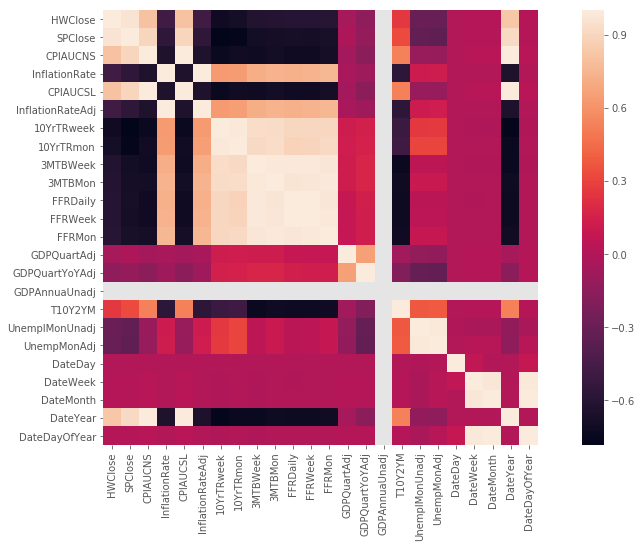

In [177]:
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('ggplot')
cormat = fullcomb3.corr()
sns.heatmap(cormat, square=True);

**Observations**
- There is a high positive correlation between Honeywell stock price and the market index. Further evidence are exhibited below
- There is a high positive correlation between Honeywell stock price and the consumer price index
- As expected, there is a high negative correlation between the stock price and inflation, and the various interest rates (weekly and monthly 10-Yr Treasuries, Treasury Bills, and Federal Funds Rates).
- GDP and Days of the week, month, and year have weak correlation with the stock price

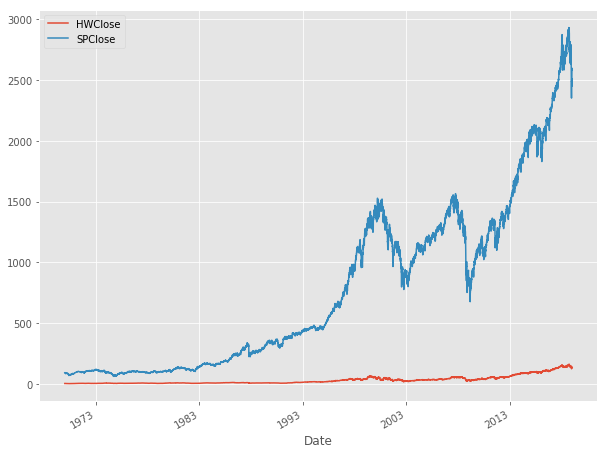

In [178]:
fullcomb3[['HWClose','SPClose']].plot(figsize=(10,8));

In [179]:
# Computing cummulative return for the stock and index (S&P500)
retr = fullcomb3[['HWClose','SPClose']].apply(lambda x: x / x[0])

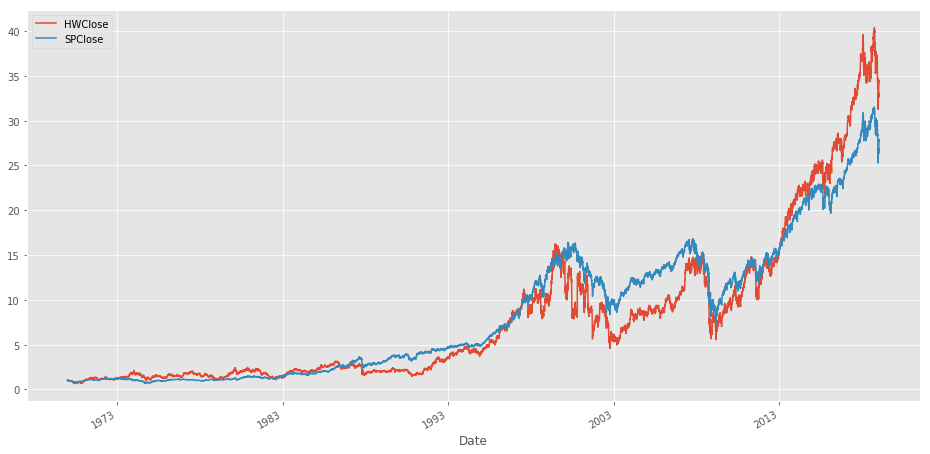

In [180]:
# Plotting cummulative return
retr.plot();

In [181]:
# Computing daily return
retHW = (fullcomb3['HWClose'].pct_change(1))*100
retSP = (fullcomb3['SPClose'].pct_change(1))*100

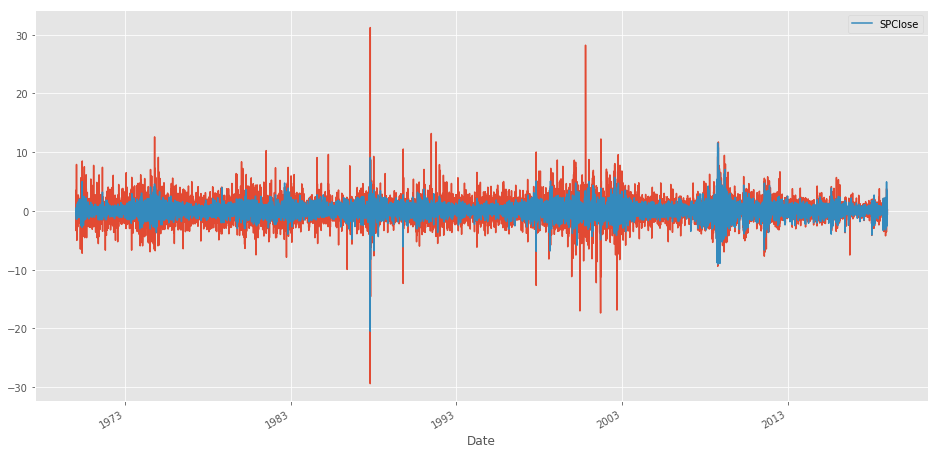

In [182]:
# Plotting daily return
retHW.plot(),retSP.plot(legend=True);

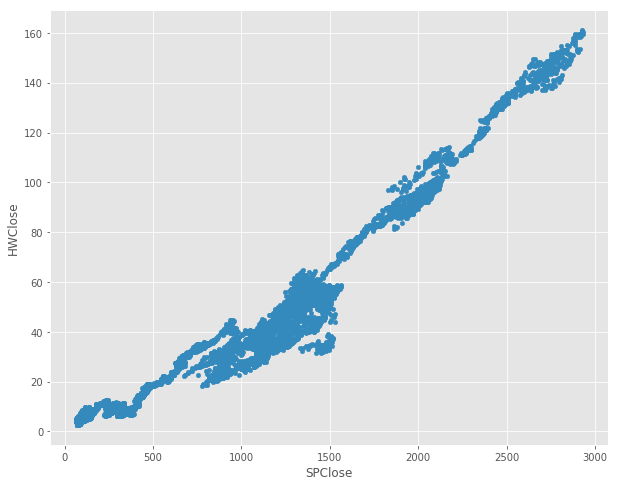

In [183]:
fullcomb3[['HWClose','SPClose']].plot(kind='scatter', x='SPClose',y='HWClose',figsize=(10,8));

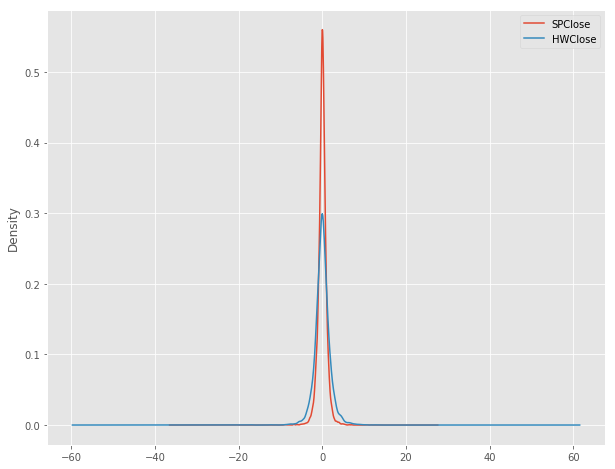

In [184]:
retSP.plot(kind='kde',legend=True),retHW.plot(kind='kde',legend=True, figsize=(10,8));

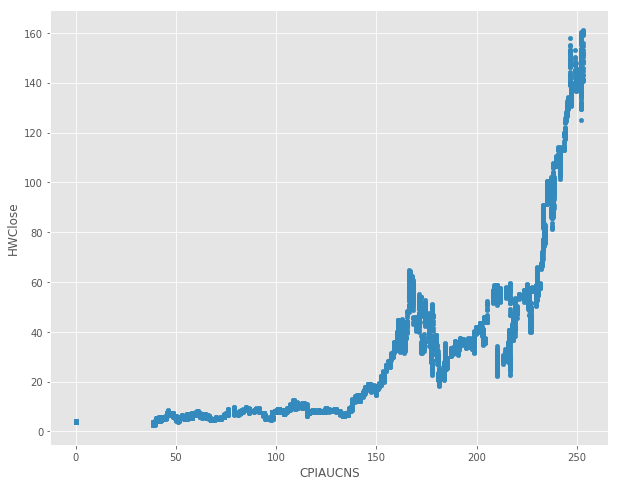

In [185]:
fullcomb3[['HWClose','CPIAUCNS']].plot(kind='scatter', x='CPIAUCNS',y='HWClose',figsize=(10,8));

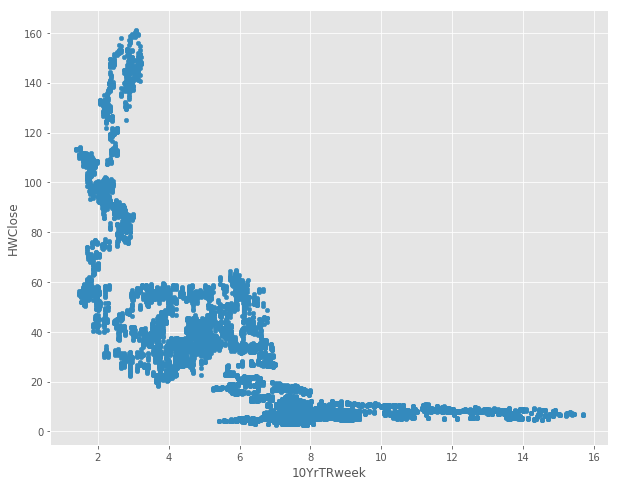

In [186]:
fullcomb3[['HWClose','10YrTRweek']].plot(kind='scatter', x='10YrTRweek',y='HWClose',figsize=(10,8));

- There appears to be a somewhat negative relationsip between the weekly 10-Yr Treasury and Honeywell stock price. This conforms to general reactions in the market where higher interest rates have adverse consequences on stock prices.

## Predictive Analytics  - Part A Machine Learning

### Importing the Regression Libraries and Metrics

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### selecting the Features and Splitting the dataset

In [188]:
dataset = fullcomb3 # changing the object for easy referencing

In [189]:
dataset.head()

,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,3.992235,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,7.92,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1970-01-05,4.131268,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
1970-01-06,4.131268,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.93,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
1970-01-07,4.111406,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,7.9,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
1970-01-08,4.210715,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


In [190]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [191]:
X.head()

,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,3MTBWeek,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,7.92,8.02,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1970-01-05,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,7.91,8.02,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
1970-01-06,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.93,8.02,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
1970-01-07,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,7.9,8.02,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
1970-01-08,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.91,8.02,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


In [192]:
y.head()

Date
1970-01-02    3.992235
1970-01-05    4.131268
1970-01-06    4.131268
1970-01-07    4.111406
1970-01-08    4.210715
Name: HWClose, dtype: float64

### Splitting the dataset

- In splitting the dataset, the last 1 month shall be used as the test set. For trading purposes, 20 days shall be applied
- Thus, we want to predict Honeywell stock price for the next 20 days.

In [194]:
dataset.shape

(12370, 31)

In [195]:
X_train = X.iloc[:12350]
X_test = X.iloc[12350:]
y_train = y.iloc[:12350]
y_test = y.iloc[12350:]

In [196]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12350, 30), (12350,), (20, 30), (20,))

In [197]:
y_train.tail()

Date
2018-12-07    138.710007
2018-12-10    137.949997
2018-12-11    136.809998
2018-12-12    138.289993
2018-12-13    138.820007
Name: HWClose, dtype: float64

In [198]:
X_train.tail()

,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,3MTBWeek,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-07,2633.080078,252.038,2.176601,252.876,2.208875,2.85,2.9,3.12,2.35,2.36,...,0.0,0.13,0.26,3.5,3.7,7,49,12,2018,341
2018-12-10,2637.719971,252.038,2.176601,252.876,2.208875,2.85,2.9,3.12,2.37,2.36,...,0.0,0.13,0.26,3.5,3.7,10,50,12,2018,344
2018-12-11,2636.780029,252.038,2.176601,252.876,2.208875,2.89,2.9,3.12,2.37,2.36,...,0.0,0.11,0.26,3.5,3.7,11,50,12,2018,345
2018-12-12,2651.070068,252.038,2.176601,252.876,2.208875,2.91,2.9,3.12,2.39,2.36,...,0.0,0.14,0.26,3.5,3.7,12,50,12,2018,346
2018-12-13,2650.540039,252.038,2.176601,252.876,2.208875,2.91,2.9,3.12,2.38,2.36,...,0.0,0.16,0.26,3.5,3.7,13,50,12,2018,347


### Scaling the Features

In [199]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Algorithms

In [649]:
# list of different regressors
regs = {
'LinearRegression' : LinearRegression(),
'KNeighborsRegressor': KNeighborsRegressor(),
'DecisionTreeRegressor': DecisionTreeRegressor(),
'MLPRegressor': MLPRegressor(),
'KNeighborsRegressor': KNeighborsRegressor(),
'BaggingRegressor': BaggingRegressor(),
'AdaBoostRegressor': AdaBoostRegressor(),
'RandomForestRegressor': RandomForestRegressor(),
'GradientBoostingRegressor': GradientBoostingRegressor(),
'XGBRegressor': XGBRegressor()
}

In [650]:
# Metrics for the regressors
models_report = pd.DataFrame(columns = ['Model','MSE','RMSE','Explained_Var', 'MAE', 'R-Squared'])

for reg, reg_name in zip(regs.values(), regs.keys()):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_score = reg.score(X_test,y_test)
    
    
    t = pd.Series({ 
                     'Model': reg_name,
                     'MSE': metrics.mean_squared_error(y_test, y_pred),
                     'RMSE': sqrt(metrics.mean_squared_error(y_test, y_pred)),
                     'Explained_Var': metrics.explained_variance_score(y_test, y_pred),
                     'MAE': metrics.mean_absolute_error(y_test, y_pred),                     
                     'R-Squared': metrics.r2_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,MSE,RMSE,Explained_Var,MAE,R-Squared
0,LinearRegression,65.752628,8.108799,0.636268,7.863845,-5.112704
1,KNeighborsRegressor,191.072284,13.822890,-0.297911,13.308306,-16.763065
2,DecisionTreeRegressor,18.660821,4.319817,-0.521645,3.365376,-0.734806
3,MLPRegressor,9.415630,3.068490,0.177120,2.694588,0.124674
4,BaggingRegressor,11.673843,3.416701,-0.019494,2.771882,-0.085261
5,AdaBoostRegressor,25.775771,5.076984,-0.205843,3.912639,-1.396249
6,RandomForestRegressor,10.579520,3.252617,0.101561,2.695053,0.016473
7,GradientBoostingRegressor,12.207124,3.493870,0.945526,3.408982,-0.134837
8,XGBRegressor,8.079068,2.842370,0.879803,2.605022,0.248928


- Given the project objective is to predict Honeywell stock prices as accurate as possible, the key metrics will be the root mean squared error (RMSE) and the mean squared error (MSE). Please note that RMSE is the square root of MSE.
- RMSE is preferred to mean absolute error (MAE) as it penalizes large errors.
- RMSE for all algorithms all look good and under 10 with the exception of that for KNN.
- XGBoost Regressor appears to be the best model, followed by sklearn's MLP Regressor (an artificial neural net).
- No significant improvements in model performance are observed after tuning the hyperparameters.

### Stacking Regressor

In [202]:
xgb = XGBRegressor()
gb = GradientBoostingRegressor()
bg = BaggingRegressor()
rf = RandomForestRegressor()

stregr = StackingRegressor(regressors=[xgb, gb, bg], 
                           meta_regressor=rf)

In [204]:
stregr.fit(X_train, y_train)
y_pred_stregr = stregr.predict(X_test)

In [205]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_stregr)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_stregr))))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_stregr)))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_stregr)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_stregr)))

MSE is 12.324913
RMSE is 3.510686
MAE is 3.127540
Explained_Var is 0.292203
R-Squared is -0.145787


### Plotting Predictions

In [671]:
prediction = pd.DataFrame(y_pred)
testset = pd.DataFrame(y_test)

In [723]:
combplot = [testset, prediction]
combplot1 = pd.concat(combplot)

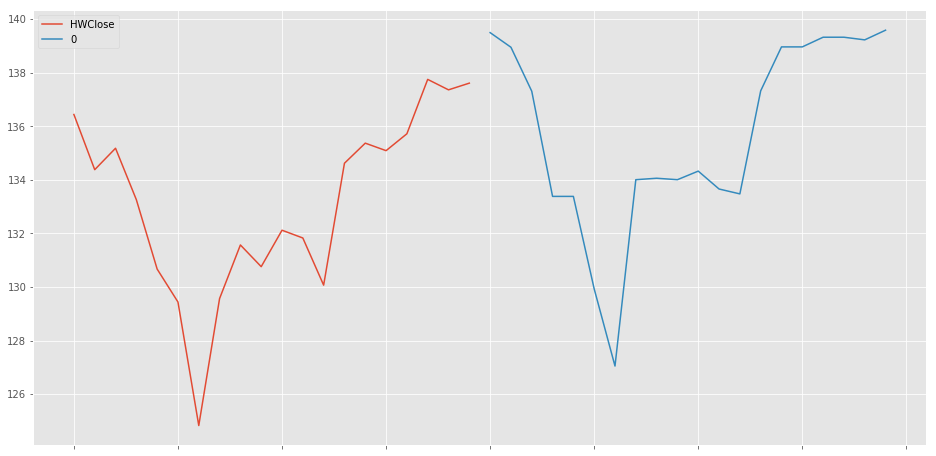

In [724]:
combplot1.plot()

In [725]:
testset.to_csv('testset.csv')
prediction.to_csv('prediction.csv')

In [726]:
testset1 = pd.read_csv('testset.csv')
prediction1 = pd.read_csv('prediction.csv')

In [735]:
predicData = testset1.join(prediction1)

In [737]:
predicData.head()

,Date,HWClose,Unnamed: 0,0
0,2018-12-14,136.440002,0,139.49564
1,2018-12-17,134.380005,1,138.94951
2,2018-12-18,135.179993,2,137.30821
3,2018-12-19,133.259995,3,133.38274
4,2018-12-20,130.669998,4,133.38274


In [739]:
predictData1 = predicData.set_index('Date')

In [741]:
predictData1.head()

,HWClose,Unnamed: 0,0
Date,,,
2018-12-14,136.440002,0,139.49564
2018-12-17,134.380005,1,138.94951
2018-12-18,135.179993,2,137.30821
2018-12-19,133.259995,3,133.38274
2018-12-20,130.669998,4,133.38274


In [742]:
predictData2 = predictData1.drop(predictData1.columns[1],axis=1)

In [743]:
predictData2.head()

,HWClose,0
Date,,
2018-12-14,136.440002,139.49564
2018-12-17,134.380005,138.94951
2018-12-18,135.179993,137.30821
2018-12-19,133.259995,133.38274
2018-12-20,130.669998,133.38274


In [744]:
predictData2.columns = ['HWClose','HWPrediction']

In [745]:
predictData2.head()

,HWClose,HWPrediction
Date,,
2018-12-14,136.440002,139.49564
2018-12-17,134.380005,138.94951
2018-12-18,135.179993,137.30821
2018-12-19,133.259995,133.38274
2018-12-20,130.669998,133.38274


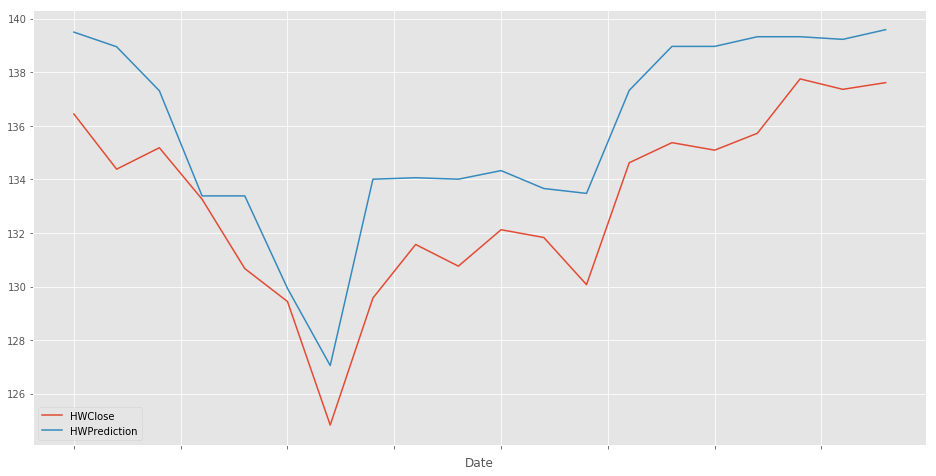

In [747]:
predictData2[['HWClose','HWPrediction']].plot();

- The prediction seems to significantly mirrows the real stock prices.

## Tuning the Hyperparameters using GridSearch/RandomSearch

### Linear Regression

In [898]:
lr = LinearRegression()
lr_params = {'fit_intercept': [True,False]} 
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.predict(X_test)
#lr_nested_score = cross_val_score(lr_grid, X, y, cv=5)

In [899]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_lr)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_lr)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_lr)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_lr)))
lr_grid.best_params_

MSE is 65.752628
RMSE is 8.108799
Explained_Var is 0.636268
MAE is 7.863845
R-Squared is -5.112704


{'fit_intercept': True}

### K-Nearest Neigbor Regressor

In [901]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors': np.arange(2,15,1), 'leaf_size':np.arange(10,40,5)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
y_pred_knn = knn_grid.predict(X_test)
#knn_nested_score = cross_val_score(knn_grid, X, y, cv=5)

In [902]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_knn)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_knn))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_knn)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_knn)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_knn)))
knn_grid.best_params_

MSE is 183.404160
RMSE is 13.542679
Explained_Var is -0.105157
MAE is 13.096423
R-Squared is -16.050197


{'leaf_size': 10, 'n_neighbors': 14}

### Decison Tree Regressor

In [903]:
dt = DecisionTreeRegressor()
dt_params = {'max_depth': np.arange(3,12,1),'min_samples_split':np.arange(2,10,1),'min_samples_leaf':np.arange(1,10,1)}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
#dt_nested_score = cross_val_score(dt_grid, X, y, cv=5)

In [904]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_dt)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_dt))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_dt)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_dt)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_dt)))
dt_grid.best_params_

MSE is 22.646152
RMSE is 4.758797
Explained_Var is -0.571176
MAE is 4.136928
R-Squared is -1.105303


{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 3}

### Bagging Regressor

In [905]:
bg = BaggingRegressor()
bg_params = {'n_estimators': np.arange(4,20,2)}
bg_grid = GridSearchCV(bg, bg_params, cv=5)
bg_grid.fit(X_train, y_train)
y_pred_bg = bg_grid.predict(X_test)
#bg_nested_score = cross_val_score(bg_grid, X, y, cv=5)

In [906]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_bg)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_bg))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_bg)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_bg)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_bg)))
bg_grid.best_params_

MSE is 12.274162
RMSE is 3.503450
Explained_Var is 0.122679
MAE is 2.937135
R-Squared is -0.141069


{'n_estimators': 16}

### AdaBoost Regressor

In [907]:
ab = AdaBoostRegressor()
ab_params = {'n_estimators': np.arange(50,500,50),'learning_rate':np.arange(0.4,2.0,0.2)}
ab_grid = GridSearchCV(ab, ab_params, cv=5)
ab_grid.fit(X_train, y_train)
y_pred_ab = ab_grid.predict(X_test)
#ab_nested_score = cross_val_score(ab_grid, X, y, cv=5)

In [908]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_ab)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_ab))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_ab)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_ab)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_ab)))
ab_grid.best_params_

MSE is 15.861430
RMSE is 3.982641
Explained_Var is 0.821159
MAE is 3.733321
R-Squared is -0.474560


{'learning_rate': 1.8000000000000003, 'n_estimators': 150}

### Random Forest Regressor

In [910]:
rf = RandomForestRegressor()
rf_params = {'n_estimators': np.arange(50,500,50)}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
#rf_nested_score = cross_val_score(rf_grid, X, y, cv=5)

In [911]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_rf)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_rf))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_rf)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_rf)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_rf)))
rf_grid.best_params_

MSE is 12.695998
RMSE is 3.563144
Explained_Var is 0.013693
MAE is 3.024465
R-Squared is -0.180286


{'n_estimators': 50}

### Gradient Boosting Regressor

In [912]:
gb = GradientBoostingRegressor()
gb_params = {'n_estimators': np.arange(100,500,50),'learning_rate' : np.arange(0.01,0.1,0.02), 'max_depth':np.arange(3,11,2)}
gb_grid = GridSearchCV(gb, gb_params, cv=5)
#gb_grid = RandomizedSearchCV(gb, param_distributions=gb_params, refit=True)
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.predict(X_test)
#gb_nested_score = cross_val_score(gb_grid, X, y, cv=5)

In [913]:
print("MSE is {0:6f}".format(metrics.mean_squared_error(y_test, y_pred_gb)))
print("RMSE is {0:6f}".format(sqrt(metrics.mean_squared_error(y_test, y_pred_gb))))
print("Explained_Var is {0:6f}".format(metrics.explained_variance_score(y_test, y_pred_gb)))
print("MAE is {0:6f}".format(metrics.mean_absolute_error(y_test, y_pred_gb)))
print("R-Squared is {0:6f}".format(metrics.r2_score(y_test, y_pred_gb)))
gb_grid.best_params_

MSE is 19.597532
RMSE is 4.426910
Explained_Var is -0.446258
MAE is 3.797114
R-Squared is -0.821888


{'learning_rate': 0.08999999999999998, 'max_depth': 7, 'n_estimators': 450}

## Part B - Using Deep Neural Network

### Long Short Term Memory (LSTM)

**Summary**

A Recurrent Neural Network (RNN) is a class of neural networks and is more suited for time series data. It looks like a feed forward neural network, however it has connections pointing backwards. However, as a result of vanishing gradient problem, an RNN is not able to remember information far back in the past. Here comes Long Short Term Memory (LSTM).

Long short-term memory (LSTM) units are units of a recurrent neural network (RNN). An RNN composed of LSTM units is often called an LSTM network (or just LSTM). A common LSTM unit is composed of a **cell**, an **input gate**, an **output gate** and a **forget gate**. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the **exploding and vanishing gradient** problems that can be encountered when training traditional RNNs

References: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

### Importing the Libraries

In [749]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

Using TensorFlow backend.


In [750]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12350, 30), (20, 30), (12350,), (20,))

In [825]:
dataset1 = dataset.reset_index()

In [826]:
dataset1.head()

,Date,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
0,1970-01-02,3.992235,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1,1970-01-05,4.131268,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
2,1970-01-06,4.131268,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
3,1970-01-07,4.111406,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
4,1970-01-08,4.210715,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


In [829]:
dataset2 = dataset1.drop(dataset1.columns[[0]],axis=1) # Dropping the Date column for easy data manipulation and plotting

In [830]:
dataset2.head()

,HWClose,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
0,3.992235,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,7.92,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1,4.131268,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
2,4.131268,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.93,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
3,4.111406,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,7.9,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
4,4.210715,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.91,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


In [831]:
nX = dataset2.iloc[:,1:] # Selecting the features
ny = dataset2.iloc[:,0] # Slecting the dependent variable

In [833]:
ny.head()

0    3.992235
1    4.131268
2    4.131268
3    4.111406
4    4.210715
Name: HWClose, dtype: float64

In [837]:
# Splitting the dataset into training and test sets. The test sets as pointed out earlier comprise the last 20 days.
nX_train = nX.iloc[:12350]
nX_test = nX.iloc[12350:]
ny_train = ny.iloc[:12350]
ny_test = ny.iloc[12350:]

In [838]:
nX_train.shape, ny_train.shape, nX_test.shape, ny_test.shape

((12350, 30), (12350,), (20, 30), (20,))

In [845]:
scaler = StandardScaler()
nX_train = scaler.fit_transform(nX_train)
nX_test = scaler.transform(nX_test)

### The LSTM Architecture

In [914]:
# Defining the model and adding neurons and layers
model=Sequential()
model.add(LSTM(250,input_shape=(nX_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [915]:
#Reshaping a 2D input data to 3D using reshape
nX_train = nX_train.reshape((nX_train.shape[0],nX_train.shape[1],1)) 
nX_test = nX_test.reshape((nX_test.shape[0],nX_test.shape[1],1))

In [916]:
model.fit(nX_train,ny_train,epochs=300,batch_size=16,shuffle=False)

Epoch 1/300
12350/12350 [==============================] - 91s - loss: 227.4026    
Epoch 2/300
12350/12350 [==============================] - 86s - loss: 328.4136    
Epoch 3/300
12350/12350 [==============================] - 86s - loss: 947.3309    
Epoch 4/300
12350/12350 [==============================] - 84s - loss: 955.6126    
Epoch 5/300
12350/12350 [==============================] - 86s - loss: 974.0163    
Epoch 6/300
12350/12350 [==============================] - 86s - loss: 407.0138    
Epoch 7/300
12350/12350 [==============================] - 82s - loss: 706.6079    
Epoch 8/300
12350/12350 [==============================] - 87s - loss: 546.8075    
Epoch 9/300
12350/12350 [==============================] - 82s - loss: 514.0047    
Epoch 10/300
12350/12350 [==============================] - 91s - loss: 615.0887    
Epoch 11/300
12350/12350 [==============================] - 87s - loss: 467.0056    
Epoch 12/300
12350/12350 [==============================] - 148s - loss: 4

12350/12350 [==============================] - 110s - loss: 11.7025   
Epoch 198/300
12350/12350 [==============================] - 107s - loss: 11.2581   
Epoch 199/300
12350/12350 [==============================] - 100s - loss: 11.9595   
Epoch 200/300
12350/12350 [==============================] - 94s - loss: 11.1020    
Epoch 201/300
12350/12350 [==============================] - 100s - loss: 13.3601   
Epoch 202/300
12350/12350 [==============================] - 97s - loss: 9.8114    
Epoch 203/300
12350/12350 [==============================] - 98s - loss: 12.4074    
Epoch 204/300
12350/12350 [==============================] - 99s - loss: 10.2619    
Epoch 205/300
12350/12350 [==============================] - 100s - loss: 10.4051   
Epoch 206/300
12350/12350 [==============================] - 89s - loss: 12.3462    
Epoch 207/300
12350/12350 [==============================] - 71s - loss: 11.8548    
Epoch 208/300
12350/12350 [==============================] - 75s - loss: 13.9107

12350/12350 [==============================] - 82s - loss: 5.9629    
Epoch 295/300
12350/12350 [==============================] - 79s - loss: 5.3486    
Epoch 296/300
12350/12350 [==============================] - 77s - loss: 5.6215    
Epoch 297/300
12350/12350 [==============================] - 80s - loss: 5.6961    
Epoch 298/300
12350/12350 [==============================] - 81s - loss: 5.2668    
Epoch 299/300
12350/12350 [==============================] - 81s - loss: 5.5621    
Epoch 300/300
12350/12350 [==============================] - 81s - loss: 5.2322    


In [917]:
predict_lstm = model.predict(nX_test)
train_values = pd.DataFrame(ny_train,index=range(12350))
holdout_predict = pd.DataFrame(predict_lstm,index=range(12350,12350+len(predict_lstm)))
holdout_values = pd.DataFrame(ny_test,index=range(12350,12350+len(predictions_lstm)))

In [874]:
predict_lstm.shape, train_values.shape, holdout_predict.shape,holdout_values.shape

((20, 1), (12350, 1), (20, 1), (20, 1))

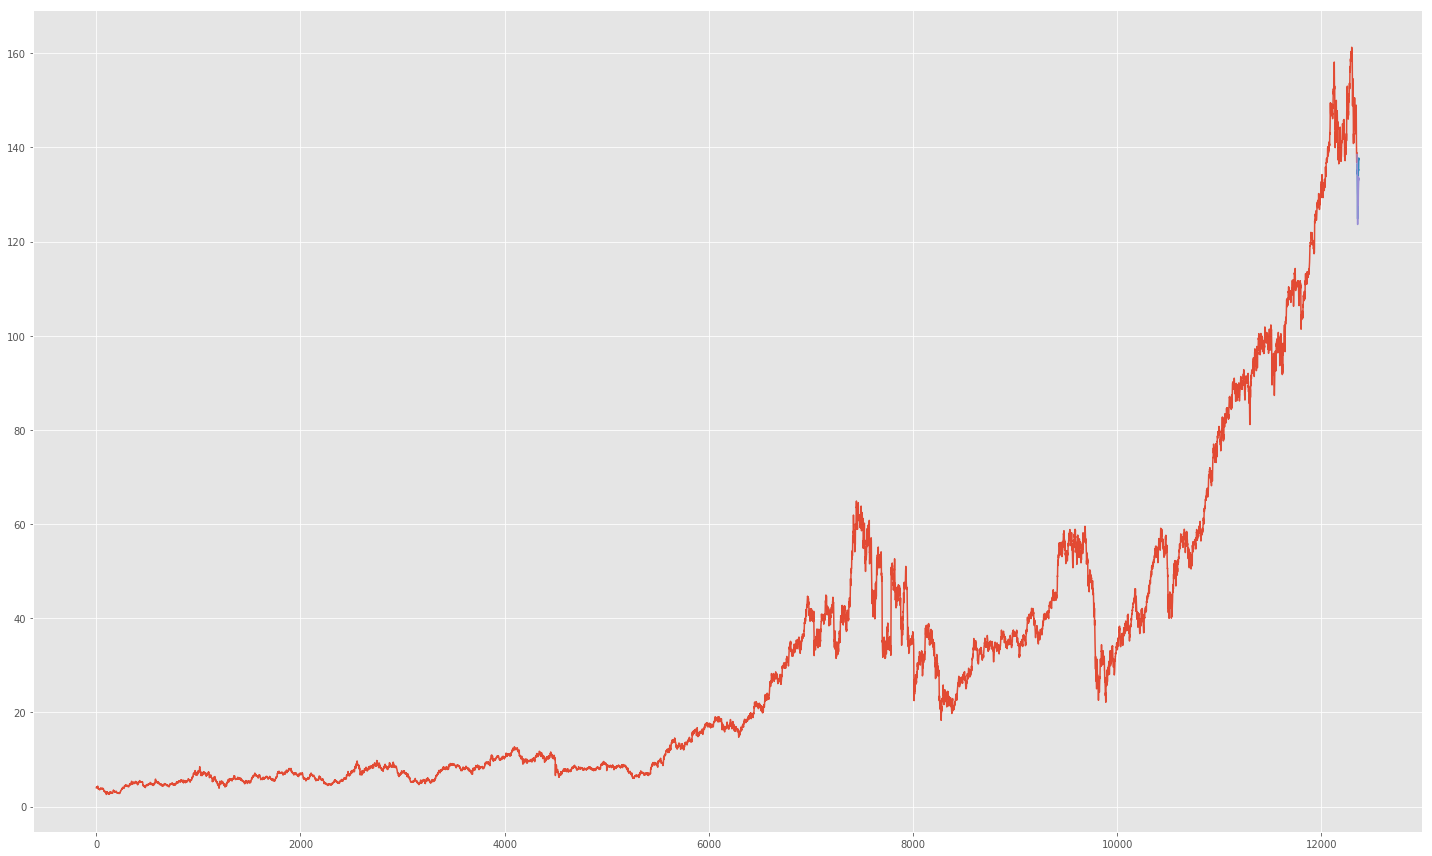

In [918]:
plt.plot(train_values)
plt.plot(holdout_values)
plt.plot(holdout_predict)
plt.rcParams["figure.figsize"] = (20,12)
plt.tight_layout();

In [919]:
rmse = sqrt(metrics.mean_squared_error(holdout_values,predict_lstm))
rmse

2.51926123931074

- **Using LSTM to predict the Honeywell stock price 20 days ahead gives the lowest root mean squared error compared to the other 9 machine learning algorithms.**

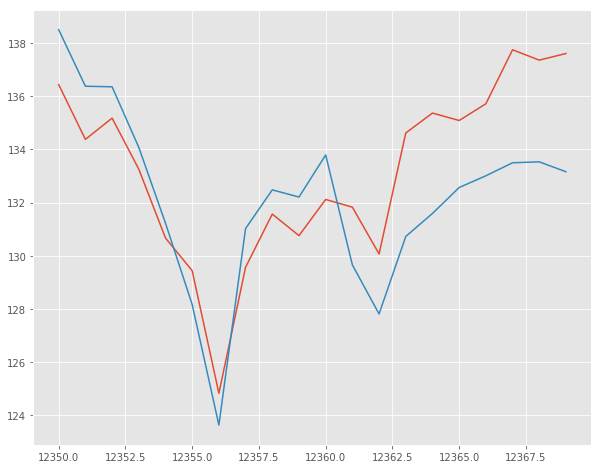

In [1008]:
plt.plot(holdout_values)
plt.plot(holdout_predict)
plt.rcParams["figure.figsize"] = (10,8);

- The prediction (blue) seems to more closely mimic the actual stock prices (red) using LSTM especially for the first 7 days, however, it starts to diverge the further away into the prediction. 

## Sequential Feature Selection using Step Forward Feature Selection

### Random Forest

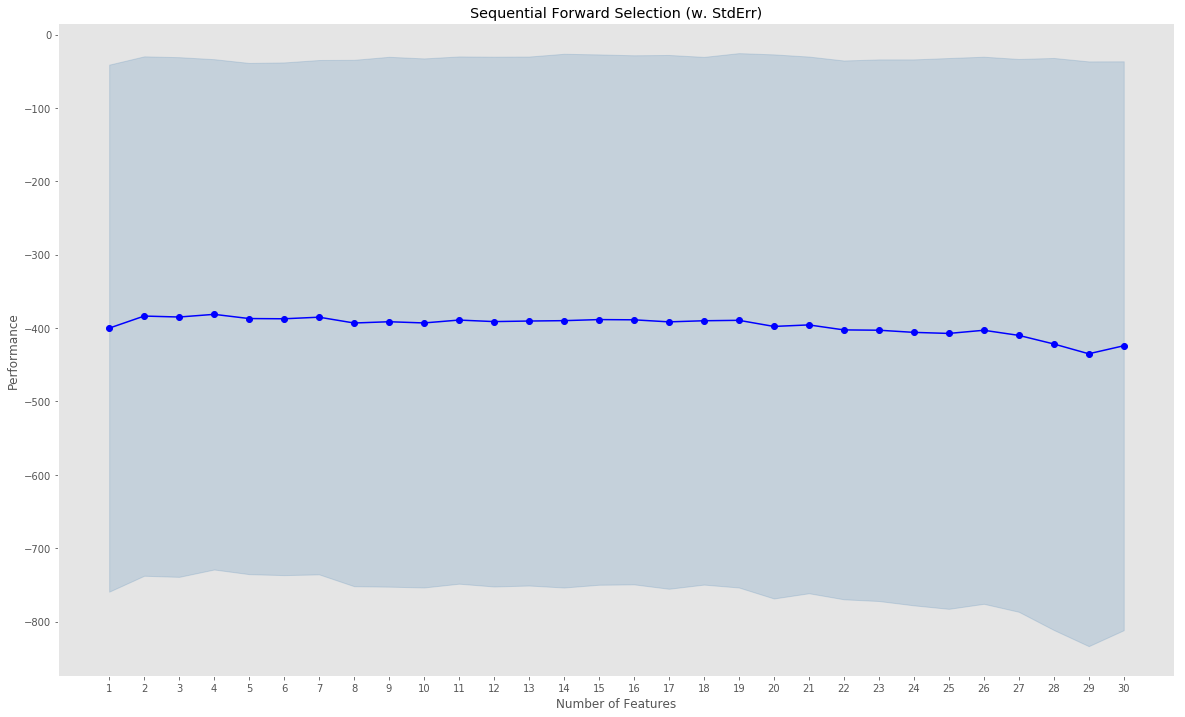

In [980]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

rf = RandomForestRegressor()

sfs = SFS(rf, 
          k_features=30, 
          forward=True, 
          floating=False, 
          scoring= 'neg_mean_squared_error', 
          cv=5)

sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### Feature Importance using XGBoost 

In [922]:
from xgboost import plot_importance

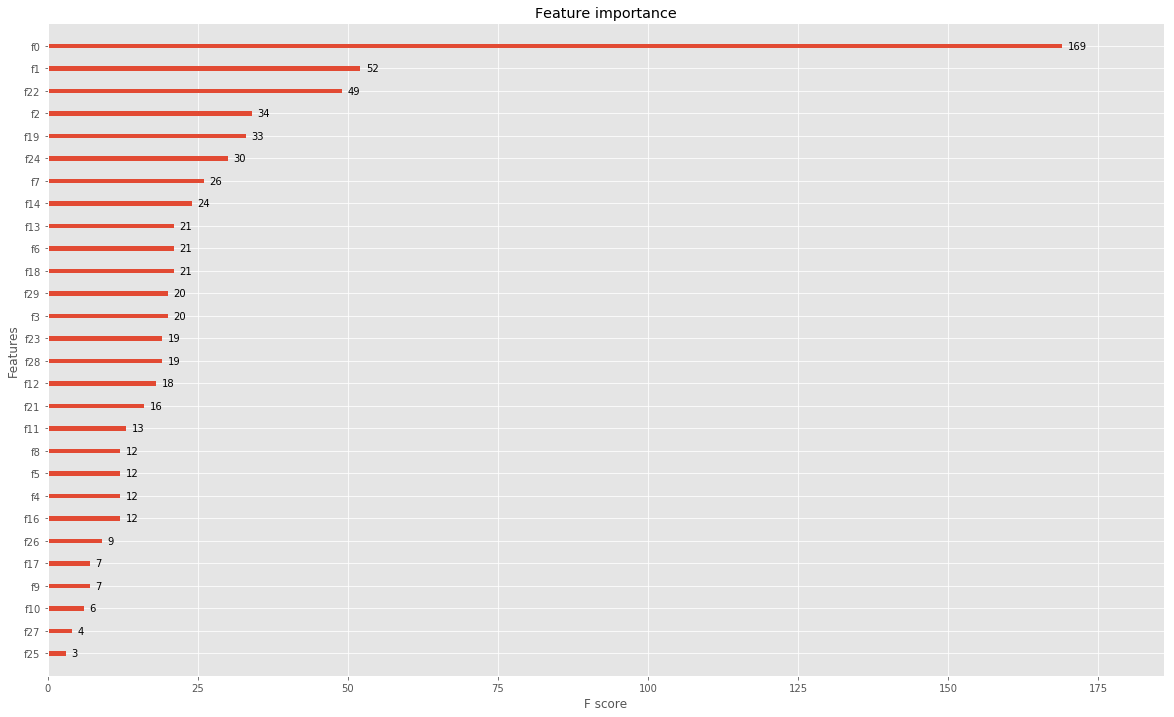

In [949]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
# plot feature importance
plot_importance(xgb)
plt.show()

- One feature seems to stand out from all other features with index 0. This is the S&P500 market index. This is not surprising. As shown earlier, the correlation between the dependent variable and the S&P500 is quite high.

### Feature Importance with Scores

In [983]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [987]:
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
rmse = sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %.3f" % (rmse))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # trainng the model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # model evaluation
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    rmse = sqrt(metrics.mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, RMSE: %.3f" % (thresh, select_X_train.shape[1], rmse*1.0))

RMSE: 2.733
Thresh=0.000, n=30, RMSE: 2.733
Thresh=0.000, n=30, RMSE: 2.733
Thresh=0.004, n=28, RMSE: 2.733
Thresh=0.006, n=27, RMSE: 2.733
Thresh=0.009, n=26, RMSE: 2.733
Thresh=0.010, n=25, RMSE: 2.703
Thresh=0.010, n=25, RMSE: 2.703
Thresh=0.013, n=23, RMSE: 2.660
Thresh=0.017, n=22, RMSE: 2.660
Thresh=0.017, n=22, RMSE: 2.660
Thresh=0.017, n=22, RMSE: 2.660
Thresh=0.017, n=22, RMSE: 2.660
Thresh=0.019, n=18, RMSE: 2.937
Thresh=0.023, n=17, RMSE: 3.226
Thresh=0.026, n=16, RMSE: 3.424
Thresh=0.028, n=15, RMSE: 2.919
Thresh=0.028, n=15, RMSE: 2.919
Thresh=0.029, n=13, RMSE: 2.481
Thresh=0.029, n=13, RMSE: 2.481
Thresh=0.030, n=11, RMSE: 1.975
Thresh=0.030, n=11, RMSE: 1.975
Thresh=0.030, n=11, RMSE: 1.975
Thresh=0.035, n=8, RMSE: 2.889
Thresh=0.038, n=7, RMSE: 2.819
Thresh=0.044, n=6, RMSE: 2.571
Thresh=0.048, n=5, RMSE: 2.913
Thresh=0.049, n=4, RMSE: 2.722
Thresh=0.071, n=3, RMSE: 2.537
Thresh=0.075, n=2, RMSE: 2.086
Thresh=0.245, n=1, RMSE: 2.543


- The overall RMSE is 2.733, however, just 1 feature contributes to about one-quarter (24.5%) to explaining changes in the dependent variable, which is the S&P500 with a corresponding lower RMSE of 2.543. 
- The top 11 features contribute to about 70% in explaining changes in the dependent variable, with an RMSE of 1.975. With a threshold of of about 70%, 11 features will bring about a reasonably lower RMSE of just about 2.
- About 4 features have no explanatory power on the dependent variable.

In [952]:
featDataset = dataset.iloc[:,1:]

In [953]:
featDataset.head()

,SPClose,CPIAUCNS,InflationRate,CPIAUCSL,InflationRateAdj,10YrTRdai,10YrTRweek,10YrTRmon,3MTBDaily,3MTBWeek,...,GDPAnnuaUnadj,T10Y2YD,T10Y2YM,UnemplMonUnadj,UnempMonAdj,DateDay,DateWeek,DateMonth,DateYear,DateDayOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,0.0,0.0,0.0,0.0,7.86,7.94,0.0,7.92,8.02,...,0.0,0,0.0,0.0,0.0,2,1,1,1970,2
1970-01-05,93.459999,0.0,0.0,0.0,0.0,7.88,7.94,0.0,7.91,8.02,...,0.0,0,0.0,0.0,0.0,5,2,1,1970,5
1970-01-06,92.820000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.93,8.02,...,0.0,0,0.0,0.0,0.0,6,2,1,1970,6
1970-01-07,92.629997,0.0,0.0,0.0,0.0,7.99,7.94,0.0,7.9,8.02,...,0.0,0,0.0,0.0,0.0,7,2,1,1970,7
1970-01-08,92.680000,0.0,0.0,0.0,0.0,7.96,7.94,0.0,7.91,8.02,...,0.0,0,0.0,0.0,0.0,8,2,1,1970,8


### Feature Importance and their Names

In [954]:
#Extract feature names from the data
feat = featDataset.keys()
feat_labels = feat.get_values()

In [956]:
feature = pd.DataFrame({'Feature':feat_labels, 'Feature importance':xgb.feature_importances_})
feature = feature.sort_values(by='Feature importance', ascending=False)
feature

,Feature,Feature importance
0,SPClose,0.245283
1,CPIAUCNS,0.075472
22,T10Y2YM,0.071118
2,InflationRate,0.049347
19,GDPQuartYoYAdj,0.047896
24,UnempMonAdj,0.043541
7,10YrTRmon,0.037736
14,DollarMajCurr,0.034833
13,DollarPound,0.030479
6,10YrTRweek,0.030479


- The S&P500 market index is the strongest driver of changes in Honeywell stock price. This is not surprising as the index is an indicator of the overall market/investors sentiment.
- Next is the non-seasonally adjusted Concumer Price Index (the seasonally adjusted CPI is not as strong, more likely because the seasonal component has been removed).  
- The third most powerful feature is the monthly 10-Yr Treasury minus 2-Yr Treasure. Not surprising as this is a key predictor of uncoming recession especially when there is a narrowing of spreads. The inflation rate is expected to make the cut given it is computed from the consumer price index. 
- Other feaures that have a strong relationship with Honeywell stock price include the quarterly numbers for real GDP, unemployment rate,the monthly Treasury Rate, the exchange rates between the US dollar and major currencies as well as the pound, etc .
- The daily fedral funds rate, annual real GDP figures, 'Day' of the month, 'Month' of the year, and some other features have weak explanatory power on Honeywell stock price. However, the day of the year has a good explanatory power.

## Limitations

- A key limitation of the project is that fundamental data were not included as features. Given that the future prospects of companies can be favorably or adversely impacted by the operational performance, incorporating fundamentals could improve model performance. 
- Sparsity of data: while Honeywell stock price were collected from the period: Jan 1970 to Jan 2019, the data for most of the features were only available 10 years later and even more. A tradeoff has to be made between sparsity and enough data for the algorithms especially deep neural network to work effectively 
- Unstructured and semi-structured data including news and texts from social and other media were also not incorporated in the project.

Please note a previous project utilizes fundamental data to classfiy stocks into good or bad stocks. Link to this project and others can be found here [ML Projects](https://github.com/adiari1/ML-Projects)

## Disclaimer

The content of this publication is intended for information and education purposes only. It is very important that you do your own analysis before making any investment decision based on your own personal circumstances. You should take independent financial advice from a professional in connection with, or independently research and verify, any information you find in this publication and wish to rely upon, whether for the purpose of making investment decision or otherwise.